<a href="https://colab.research.google.com/github/jrakhshanda/Deep-Learning/blob/master/trafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle --upgrade

In [1]:
# Info on how to get your api key (kaggle.json) here: https://github.com/Kaggle/kaggle-api#api-credentials
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
api_token = {"username":"rakhshandajabeen55","key":"2483f350dd73f648b655ddd3456c3ce1"}
import json
import zipfile
import os
!chmod 600 /root
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config path -p /content
!kaggle competitions download -c sweden-traffic-signs-classification
os.chdir('/content/')

usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')
  0% 0.00/3.54M [00:00<?, ?B/s]
100% 3.54M/3.54M [00:00<00:00, 58.7MB/s]
  0% 0.00/11.9k [00:00<?, ?B/s]
100% 11.9k/11.9k [00:00<00:00, 11.7MB/s]
  0% 0.00/3.40M [00:00<?, ?B/s]
100% 3.40M/3.40M [00:00<00:00, 113MB/s]
  0% 0.00/3.36M [00:00<?, ?B/s]
100% 3.36M/3.36M [00:00<00:00, 110MB/s]
  0% 0.00/81.9k [00:00<?, ?B/s]
100% 81.9k/81.9k [00:00<00:00, 78.5MB/s]
  0% 0.00/16.7k [00:00<?, ?B/s]
100% 16.7k/16.7k [00:00<00:00, 15.2MB/s]


In [2]:
from zipfile import ZipFile
with ZipFile('/content/data.zip', 'r') as zipObj:
    print(zipObj)
    zipObj.extractall("data")

<zipfile.ZipFile filename='/content/data.zip' mode='r'>


In [23]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras import activations

from keras.models import Sequential
from keras.layers import  Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras import backend as K
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical

from sklearn.utils import shuffle,class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import random
from matplotlib import pyplot as plt
from matplotlib import cm

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

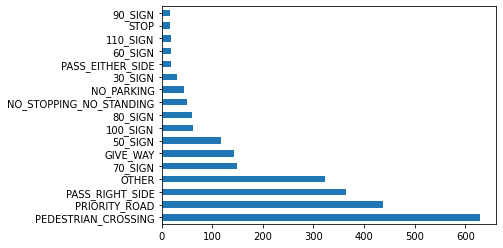

In [5]:
train["label"].value_counts().plot(kind = "barh")

In [8]:
train, validate = train_test_split(train, test_size=0.20, random_state=20)

In [9]:
im_size = (60,60)
b_size = 200
train_datagen = ImageDataGenerator(
    #rotation_range=15,
    rescale=1./255,
    #shear_range=0.1,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #width_shift_range=0.2,
    #height_shift_range=0.2
)
train_generator = train_datagen.flow_from_dataframe(
    train, 
    "/content/data/data", 
    x_col='file_name',
    y_col='label',
    target_size=im_size,
    class_mode='categorical',
    batch_size=b_size
)

Found 1401 validated image filenames belonging to 17 classes.


In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate, 
    "/content/data/data/", 
    x_col='file_name',
    y_col='label',
    target_size=im_size,
    class_mode='categorical',
    batch_size=b_size
)

Found 351 validated image filenames belonging to 17 classes.


In [29]:
def createModel( num_classes,image_shape):
  model = Sequential()

  model.add(Conv2D(16,kernel_size=(5,5),activation= "relu",input_shape = image_shape, strides=(2,2)))
  model.add(Conv2D(32,kernel_size=(5,5),strides=(2,2),activation= "relu"))
  model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation= "relu"))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(512,activation= 'relu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = ,metrics = ['accuracy'])

  return model
batch_size = b_size
num_classes = 17
image_shape = (60,60,3)
model = createModel(num_classes,image_shape)

In [30]:
#keras.utils.plot_model(model,show_shapes= True,show_layer_names=True)


In [31]:
earlyStop = EarlyStopping(patience = 20)
variable_gradient = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5, min_lr=0.001)
weights = class_weight.compute_class_weight('balanced',np.unique(train['label']),train['label'])
weights = {index:value for index,value in enumerate(weights)}

In [32]:
epochs = 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    class_weight = weights,
    callbacks=[earlyStop,variable_gradient]
)

Epoch 1/50
8/8 [==============================] - 1s 81ms/step - loss: 2.7773 - accuracy: 0.1292 - val_loss: 2.5089 - val_accuracy: 0.4444
Epoch 2/50
8/8 [==============================] - 0s 61ms/step - loss: 2.5723 - accuracy: 0.2862 - val_loss: 2.1347 - val_accuracy: 0.3390
Epoch 3/50
8/8 [==============================] - 1s 65ms/step - loss: 2.3942 - accuracy: 0.3098 - val_loss: 2.0731 - val_accuracy: 0.2279
Epoch 4/50
8/8 [==============================] - 0s 62ms/step - loss: 2.2534 - accuracy: 0.2969 - val_loss: 1.8531 - val_accuracy: 0.3960
Epoch 5/50
8/8 [==============================] - 1s 63ms/step - loss: 2.2169 - accuracy: 0.4468 - val_loss: 1.6128 - val_accuracy: 0.6296
Epoch 6/50
8/8 [==============================] - 0s 62ms/step - loss: 2.0058 - accuracy: 0.4911 - val_loss: 1.5154 - val_accuracy: 0.6068
Epoch 7/50
8/8 [==============================] - 0s 61ms/step - loss: 1.9713 - accuracy: 0.4782 - val_loss: 1.3800 - val_accuracy: 0.6724
Epoch 8/50
8/8 [===========

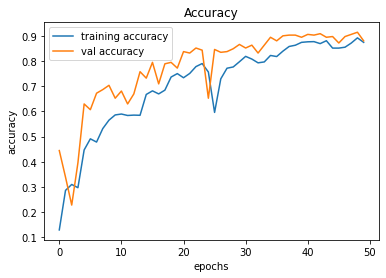

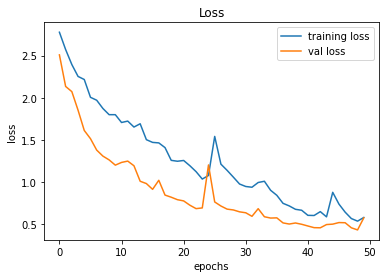

In [33]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [28]:
validation_generator.reset()
predIdxs = model.predict_generator(validation_generator)
predIdxsClasses = np.argmax(predIdxs, axis=1)
print(classification_report(validation_generator.classes, predIdxsClasses,
    target_names=validation_generator.class_indices))

                         precision    recall  f1-score   support

               100_SIGN       0.00      0.00      0.00         6
               110_SIGN       0.00      0.00      0.00         1
                30_SIGN       0.00      0.00      0.00         6
                50_SIGN       0.14      0.12      0.13        16
                60_SIGN       0.00      0.00      0.00         3
                70_SIGN       0.00      0.00      0.00        20
                80_SIGN       0.00      0.00      0.00         6
                90_SIGN       0.00      0.00      0.00         4
               GIVE_WAY       0.00      0.00      0.00        22
             NO_PARKING       0.00      0.00      0.00         6
NO_STOPPING_NO_STANDING       0.00      0.00      0.00         5
                  OTHER       0.14      0.21      0.17        34
       PASS_EITHER_SIDE       0.00      0.00      0.00         3
        PASS_RIGHT_SIDE       0.18      0.17      0.17        59
    PEDESTRIAN_CROSSING 

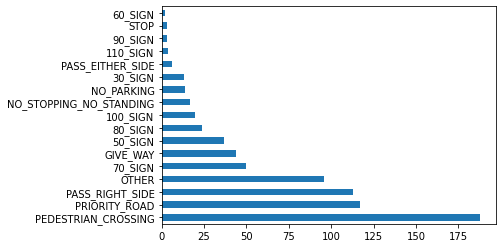

In [ ]:
validate["label"].value_counts().plot(kind = "barh")

In [ ]:
test.head()

,file_name
0,picture-176290.jpg
1,picture-834444.jpg
2,picture-768882.jpg
3,picture-212331.jpg
4,picture-277367.jpg


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test, 
    "/content/data/data/", 
    x_col='file_name',
    y_col=None,
    target_size=(70,70),
    class_mode=None,
    batch_size=32
)

Found 610 validated image filenames.


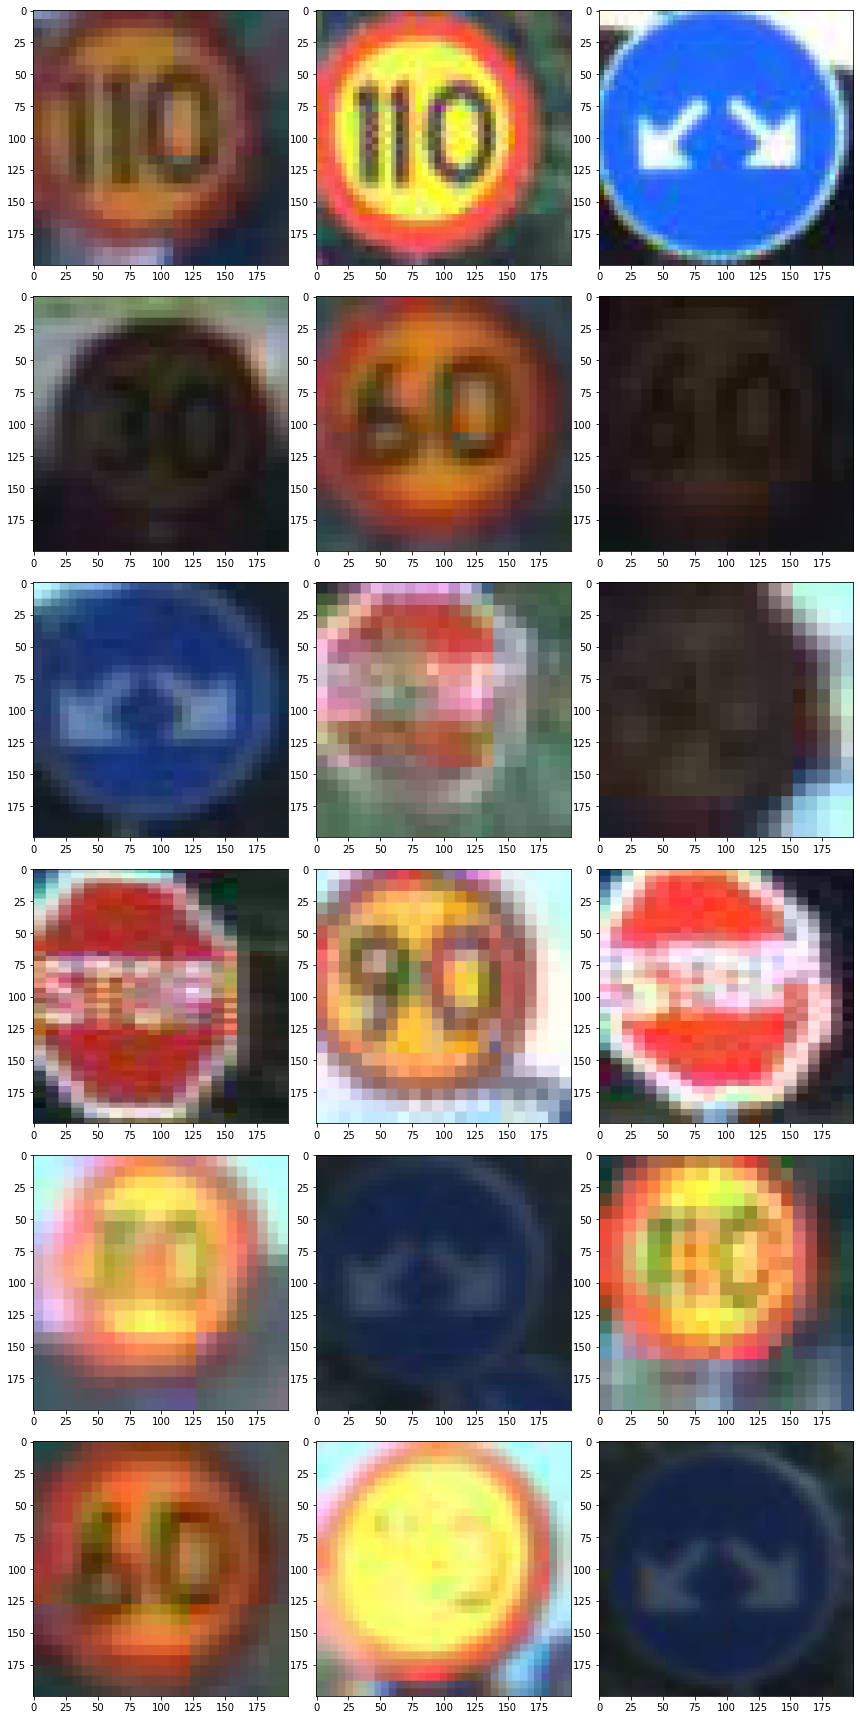

In [ ]:
sample_test = test.head(18)
sample_test.head()
pyplot.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['file_name']
    img = load_img("/content/data/data/"+filename, target_size=(200,200))
    pyplot.subplot(6, 3, index+1)
    pyplot.imshow(img)
pyplot.tight_layout()
pyplot.show()